In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression,RidgeCV,LassoCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from xgboost import XGBRegressor

In [12]:
import pandas as pd
import numpy as np

In [13]:
df=pd.read_csv('cleaned_data.csv')
df.head()

,X1,X2,X3,X6,X7,X8,Y1
0,0.98,514.5,294.0,2,0.0,0,15.55
1,0.98,514.5,294.0,3,0.0,0,15.55
2,0.98,514.5,294.0,4,0.0,0,15.55
3,0.98,514.5,294.0,5,0.0,0,15.55
4,0.90,563.5,318.5,2,0.0,0,20.84


In [14]:
X=df.drop(['Y1'], axis=1)
y=df['Y1']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
models = {
    "LinearRegression": LinearRegression(),
    "Knn" : KNeighborsRegressor(),
    "SVM" : SVR(),
    "RandomForest": RandomForestRegressor(),
    "GradientBoosting": GradientBoostingRegressor(),
    "AdaBoost" : AdaBoostRegressor(),
    "XGBoost" : XGBRegressor()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae=mean_absolute_error(y_test,y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MSE": mse, "R2": r2}
results_df = pd.DataFrame(results).T
print("Using Train Test split")
print(results_df)

Using Train Test split
                        MSE        R2
LinearRegression  11.042534  0.894058
Knn                4.885166  0.953132
SVM               37.790033  0.637442
RandomForest       0.240465  0.997693
GradientBoosting   0.275221  0.997360
AdaBoost           4.332612  0.958433
XGBoost            0.162758  0.998438


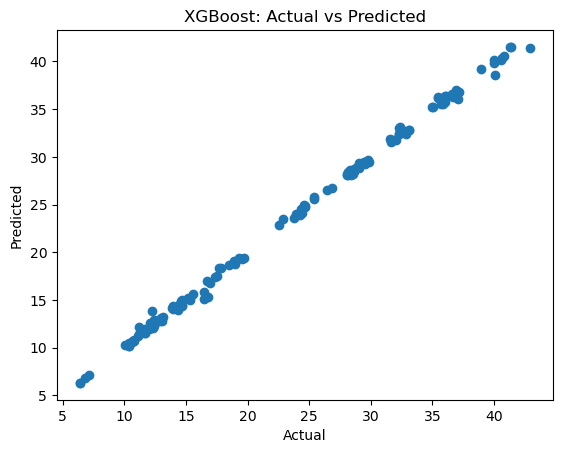

In [16]:
model1=XGBRegressor()
model1.fit(X_train,y_train)
y_pred1=model1.predict(X_test)
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred1)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("XGBoost: Actual vs Predicted")
plt.show()

In [17]:
r2=r2_score(y_test,y_pred1)
print("R2 score:",r2)
mse=mean_squared_error(y_test,y_pred1)
print("Mean Squared Error:",mse)
rmse=np.sqrt(mse)
print("Root Mean Squared Error:",rmse)

R2 score: 0.9984384948422531
Mean Squared Error: 0.16275810254306503
Root Mean Squared Error: 0.40343289719985037


In [18]:
df.columns

Index(['X1', 'X2', 'X3', 'X6', 'X7', 'X8', 'Y1'], dtype='object')

In [19]:
import pickle

with open("model.sav", "wb") as f: 
    pickle.dump(model1, f)


with open("model.sav", "rb") as f:
    loaded_model = pickle.load(f)


In [20]:
import joblib


artifact = {"model": model1, "features": list(X.columns)}
joblib.dump(artifact, "enb_xgb_artifact.joblib")

print("✅ Saved enb_xgb_artifact.joblib (contains model + feature order)")


✅ Saved enb_xgb_artifact.joblib (contains model + feature order)
